# Customer Segmentation Using RFM Analysis 🛒📈💰

## 1️⃣ Required Libraries 

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 2️⃣ Read the Dataset

In [2]:
path = r'Dataset\Online Retail.xlsx'
df = pd.read_excel(path)

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Check Columns

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df['CustomerID'] = df['CustomerID'].astype('object')

### Description

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,4372.0,17841.0,7983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Missing Values

In [11]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
(df.isna().sum() / df.shape[0]) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Check Duplications

In [15]:
df.duplicated().sum()

5225

In [16]:
( df.duplicated().sum() / df.shape[0] ) * 100

1.284323388942283

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

### Univariate Analysis

#### Column : Country

In [19]:
df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


C:\Users\moham\AppData\Local\Temp\ipykernel_11736\1181707507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


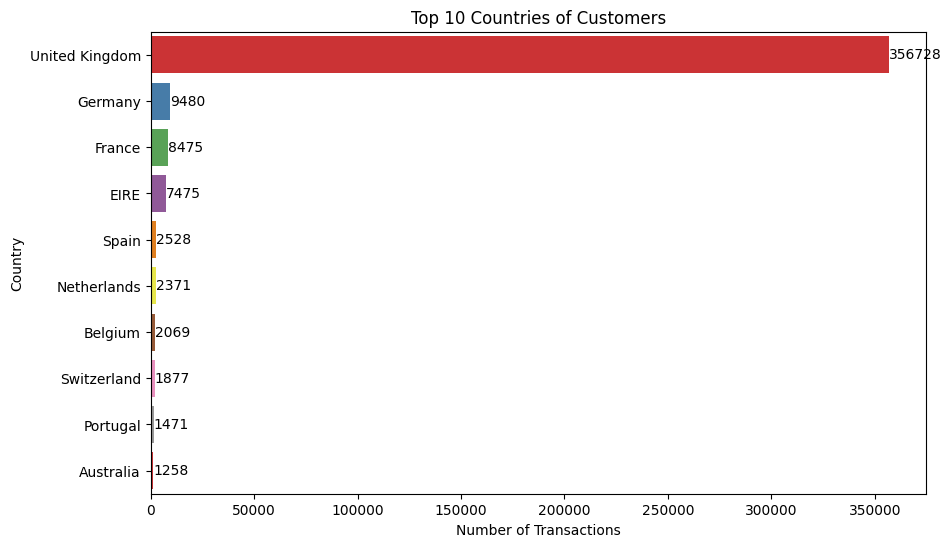

In [20]:
values = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=values.values, 
    y=values.index, 
    palette="Set1" 
)

for i, v in enumerate(values.values):
    plt.text(v + 0.5, i, str(v), va='center')

plt.xlabel("Number of Transactions")
plt.title("Top 10 Countries of Customers")
plt.show()


#### Column : InvoiceDate

In [21]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [22]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

#### Column : UnitPrice with Filter

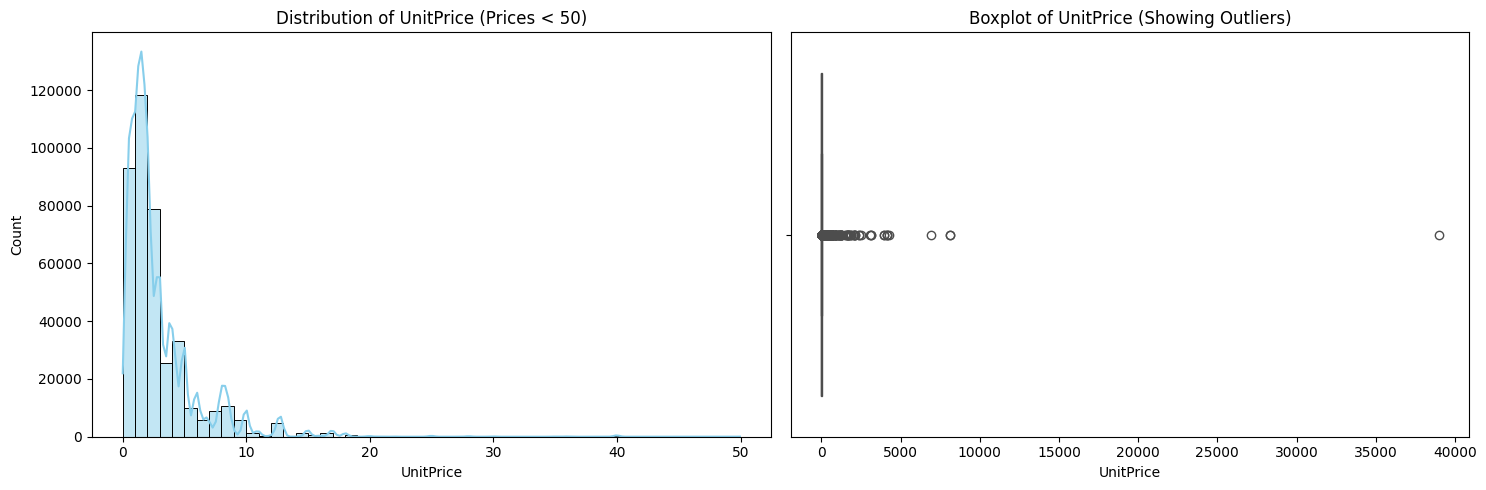

In [23]:
filtered_df = df[df['UnitPrice'] < 50]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
sns.histplot(filtered_df['UnitPrice'], color='skyblue', bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of UnitPrice (Prices < 50)")

# Boxplot 
sns.boxplot(x=df['UnitPrice'], ax=axes[1], color='orange')
axes[1].set_title("Boxplot of UnitPrice (Showing Outliers)")

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Show Number of Orders per Day 

In [24]:
orders_per_date = df.groupby(df['InvoiceDate'].dt.date).size()
orders_per_date

InvoiceDate
2010-12-01    1924
2010-12-02    2003
2010-12-03    1100
2010-12-05    2619
2010-12-06    1926
              ... 
2011-12-05    3359
2011-12-06    2602
2011-12-07    2164
2011-12-08    2566
2011-12-09     617
Length: 305, dtype: int64

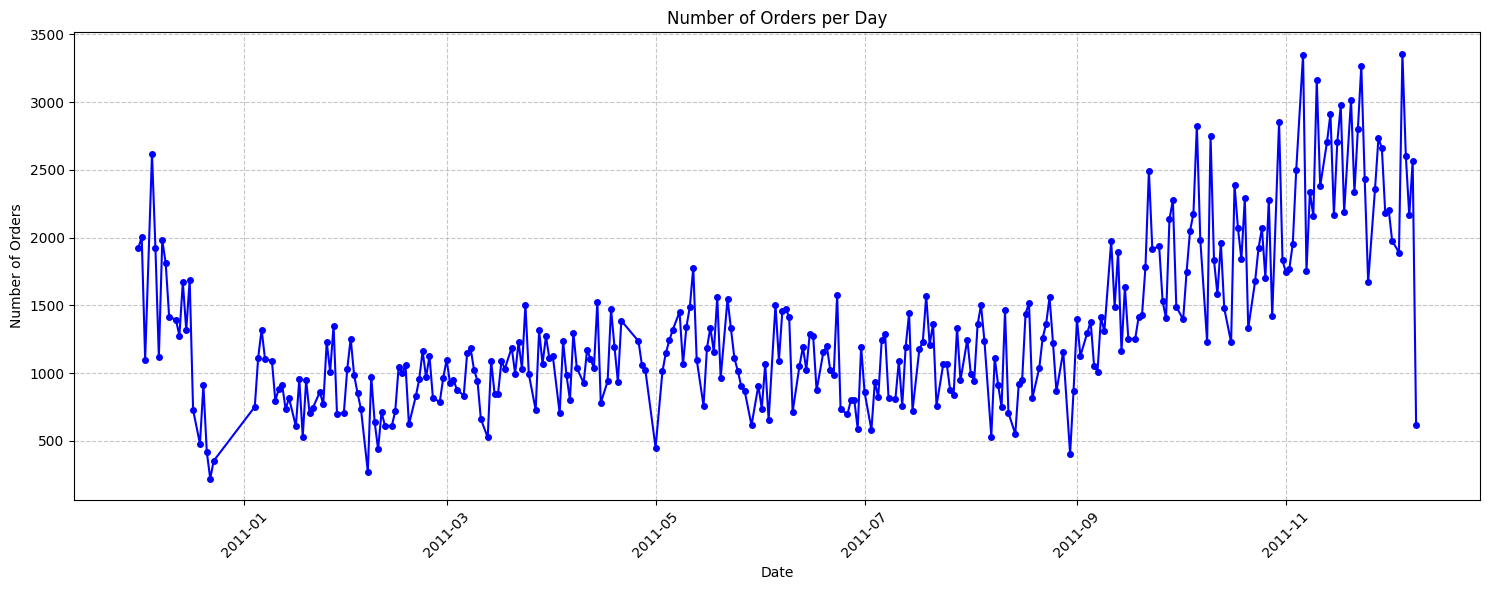

In [25]:
plt.figure(figsize=(15, 6)) 
plt.plot(orders_per_date.index, orders_per_date.values, marker='o', linestyle='-',
         color='blue', markersize=4)
plt.title("Number of Orders per Day")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Show Top Items Sold 

In [26]:
df['StockCode']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 401604, dtype: object

In [27]:
total_items_sold = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
total_items_sold.head(10)

StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
21212     33386
23084     27045
22492     25880
22616     25305
21977     24129
Name: Quantity, dtype: int64

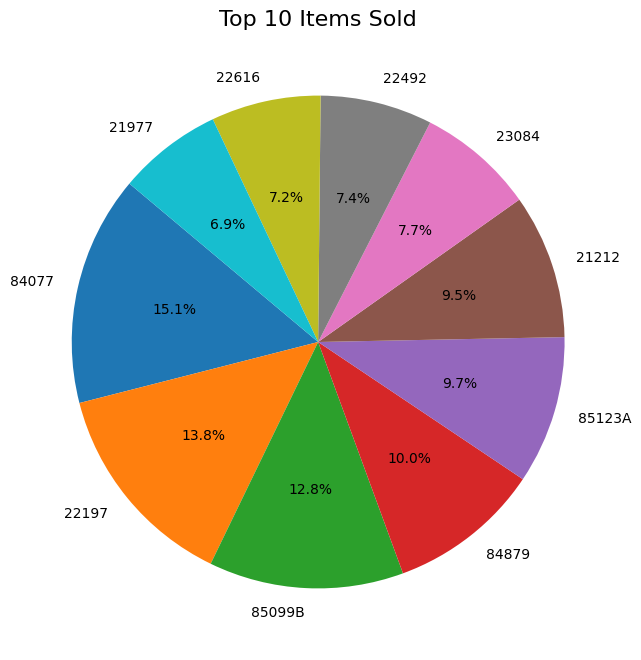

In [28]:
plt.figure(figsize=(8,8))
plt.pie(
    total_items_sold.head(10).values,
    labels=total_items_sold.head(10).index,
    autopct='%1.1f%%', 
    startangle=140,
)
plt.title("Top 10 Items Sold", fontsize=16)
plt.show()

#### Show Top Countries by Total Quantity of Items Sold

C:\Users\moham\AppData\Local\Temp\ipykernel_11736\1481397806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


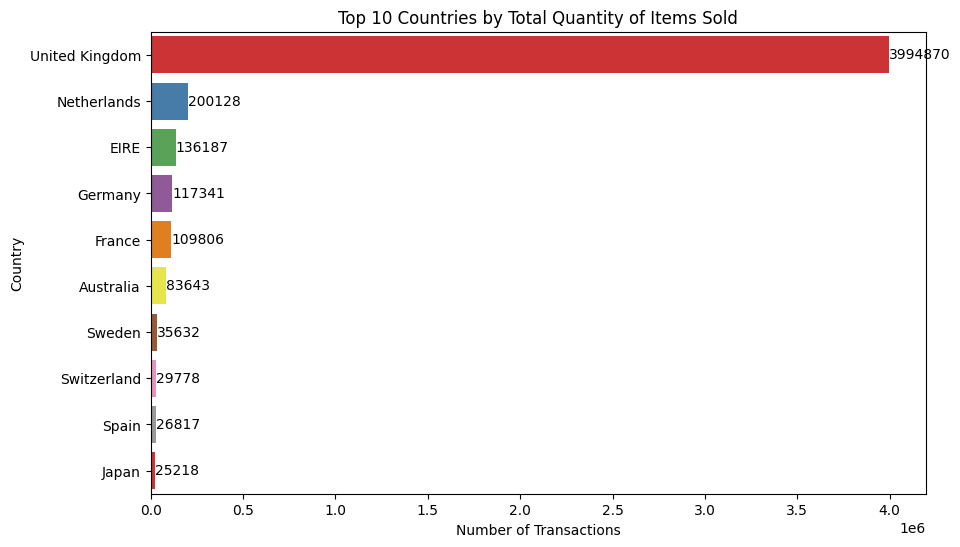

In [29]:
values = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=values.values, 
    y=values.index, 
    palette="Set1" 
)

for i, v in enumerate(values.values):
    plt.text(v + 0.5, i, str(v), va='center')

plt.xlabel("Number of Transactions")
plt.title("Top 10 Countries by Total Quantity of Items Sold")
plt.show()

## 4️⃣ Feature Engineering 

### Recency

In [30]:
df['InvoiceDate'].dt.date

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 401604, dtype: object

In [31]:
df['InvoiceDate'].max().date()

datetime.date(2011, 12, 9)

In [32]:
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
reference_date = df['InvoiceDate'].max()

In [33]:
last_purchase['Recency'] = (reference_date - last_purchase['InvoiceDate']).dt.days
last_purchase.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


### Frequency

In [34]:
orders = df.groupby('CustomerID')['InvoiceNo'].count()
orders.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [35]:
new_df = pd.merge(orders, last_purchase[['CustomerID', 'Recency']], how='left', on='CustomerID')
new_df

,CustomerID,InvoiceNo,Recency
0,12346.0,2,325
1,12347.0,182,1
2,12348.0,31,74
3,12349.0,73,18
4,12350.0,17,309
...,...,...,...
4367,18280.0,10,277
4368,18281.0,7,180
4369,18282.0,13,7
4370,18283.0,721,3


In [36]:
new_df.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)
new_df

,CustomerID,Frequency,Recency
0,12346.0,2,325
1,12347.0,182,1
2,12348.0,31,74
3,12349.0,73,18
4,12350.0,17,309
...,...,...,...
4367,18280.0,10,277
4368,18281.0,7,180
4369,18282.0,13,7
4370,18283.0,721,3


### Monetary

In [37]:
order_quantity = df.groupby('CustomerID')[['Quantity', 'UnitPrice']].max().reset_index()
order_quantity

,CustomerID,Quantity,UnitPrice
0,12346.0,74215,1.04
1,12347.0,240,12.75
2,12348.0,144,40.00
3,12349.0,36,300.00
4,12350.0,24,40.00
...,...,...,...
4367,18280.0,8,9.95
4368,18281.0,12,16.95
4369,18282.0,48,12.75
4370,18283.0,13,15.95


In [38]:
order_quantity['Monetary'] = order_quantity['Quantity'] * order_quantity['UnitPrice']

In [39]:
new_df = pd.merge(new_df, order_quantity, how='left', on='CustomerID')
new_df

,CustomerID,Frequency,Recency,Quantity,UnitPrice,Monetary
0,12346.0,2,325,74215,1.04,77183.60
1,12347.0,182,1,240,12.75,3060.00
2,12348.0,31,74,144,40.00,5760.00
3,12349.0,73,18,36,300.00,10800.00
4,12350.0,17,309,24,40.00,960.00
...,...,...,...,...,...,...
4367,18280.0,10,277,8,9.95,79.60
4368,18281.0,7,180,12,16.95,203.40
4369,18282.0,13,7,48,12.75,612.00
4370,18283.0,721,3,13,15.95,207.35


In [40]:
new_df.drop(columns=['Quantity', 'UnitPrice'] ,inplace=True)
new_df

,CustomerID,Frequency,Recency,Monetary
0,12346.0,2,325,77183.60
1,12347.0,182,1,3060.00
2,12348.0,31,74,5760.00
3,12349.0,73,18,10800.00
4,12350.0,17,309,960.00
...,...,...,...,...
4367,18280.0,10,277,79.60
4368,18281.0,7,180,203.40
4369,18282.0,13,7,612.00
4370,18283.0,721,3,207.35


### RFM Scores

In [41]:
new_df['R_Score'] = pd.qcut(new_df['Recency'], 5 , labels=[5, 4, 3, 2, 1])
new_df['F_Score'] = pd.qcut(new_df['Frequency'].rank(method='first'), 5 , labels=[5, 4, 3, 2, 1])
new_df['M_Score'] = pd.qcut(new_df['Monetary'], 5 , labels=[5, 4, 3, 2, 1])

In [43]:
new_df['RFM_Segment'] = new_df['R_Score'].astype(str) + new_df['F_Score'].astype(str) + new_df['M_Score'].astype(str)

new_df['R_Score'] = new_df['R_Score'].astype(int)
new_df['F_Score'] = new_df['F_Score'].astype(int)
new_df['M_Score'] = new_df['M_Score'].astype(int)

new_df['RFM_Score'] = new_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

new_df.head()

,CustomerID,Frequency,Recency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,2,325,77183.6,1,5,1,151,7
1,12347.0,182,1,3060.0,5,1,1,511,7
2,12348.0,31,74,5760.0,2,3,1,231,6
3,12349.0,73,18,10800.0,4,2,1,421,7
4,12350.0,17,309,960.0,1,4,2,142,7


### Final DataFrame

In [44]:
new_df.head()

,CustomerID,Frequency,Recency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,2,325,77183.6,1,5,1,151,7
1,12347.0,182,1,3060.0,5,1,1,511,7
2,12348.0,31,74,5760.0,2,3,1,231,6
3,12349.0,73,18,10800.0,4,2,1,421,7
4,12350.0,17,309,960.0,1,4,2,142,7


## 5️⃣ Data Transformation

In [46]:
working_df = new_df.copy() 
working_df.dropna(inplace=True)
working_df = working_df[(working_df['Recency'] >= 0) & 
                        (working_df['Frequency'] > 0) & 
                        (working_df['Monetary'] > 0)]

rfm_log = working_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p, axis=1)

In [47]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

## 6️⃣ Visulization 

### kmeans

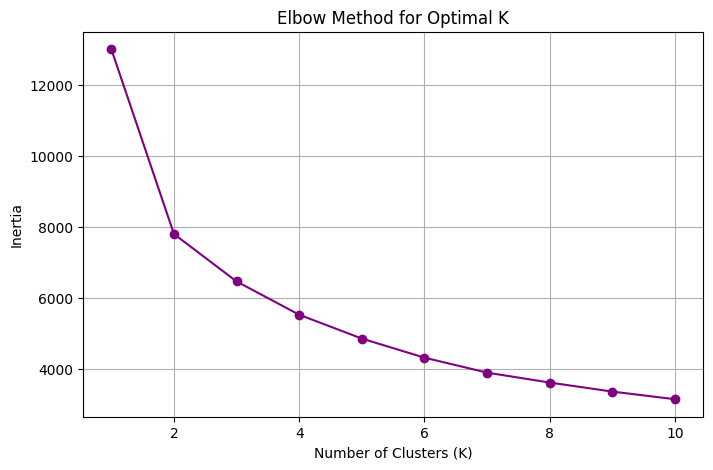

In [48]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='purple')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Distribution of Customer Segments

In [49]:
def segment_me(df):
    if df['RFM_Score'] >= 13:
        return 'Champions (Best)'
    elif (df['RFM_Score'] >= 9) and (df['RFM_Score'] < 13):
        return 'Loyal Customers'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'At Risk / Potential'
    else:
        return 'Hibernating (Lost)'

working_df['General_Segment'] = working_df.apply(segment_me, axis=1)

segment_stats = working_df.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

C:\Users\moham\AppData\Local\Temp\ipykernel_11736\3333908660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=working_df, x='General_Segment', palette='viridis',


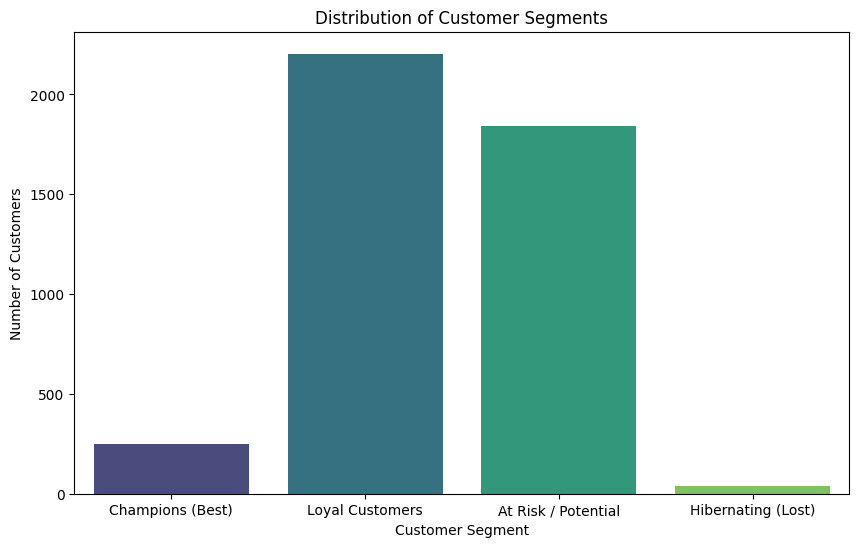

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=working_df, x='General_Segment', palette='viridis', 
              order=['Champions (Best)', 'Loyal Customers', 'At Risk / Potential', 'Hibernating (Lost)'])
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

## Thank You 🎀🫶🏻💌